In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from pandas.tseries.frequencies import to_offset

import matplotlib
import matplotlib.pyplot as plt

from astropy.time import Time

matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120

In [2]:
gemini_data = '/scratch/cwwalter/2022_03_16.txt'

gemini = pd.read_csv(gemini_data, parse_dates=[['Date','Time']], index_col='Date_Time', delim_whitespace=True)
gemini_5 = gemini.resample('5min').mean()
#gemini
#gemini_5

(0.3, 1.1)

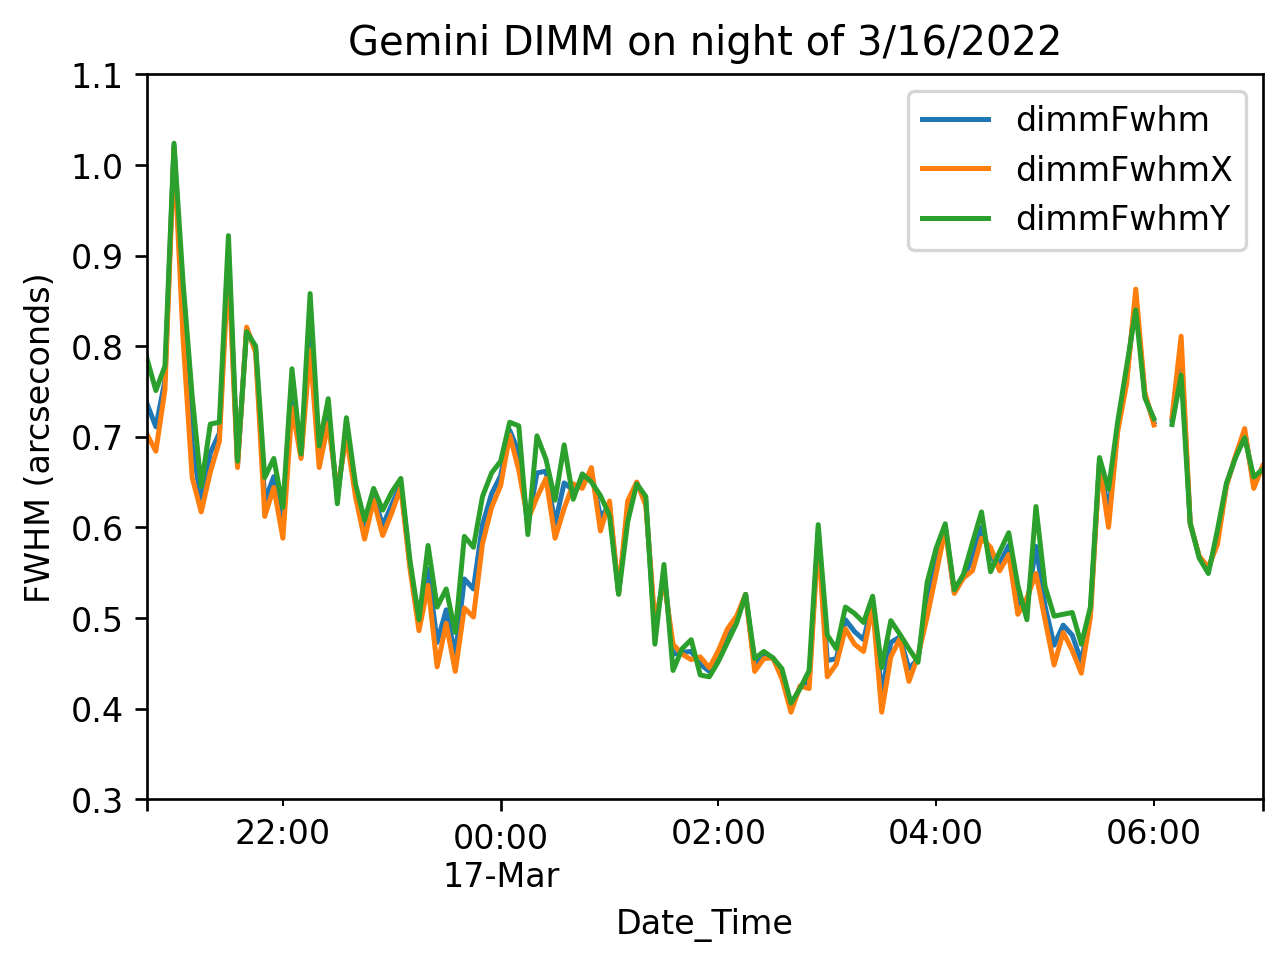

In [3]:
#Total is averaged seeing, X is left star, Y is right.

gemini_5.plot()

plt.title(r'Gemini DIMM on night of 3/16/2022')
plt.ylabel(r'FWHM (arcseconds)');

plt.ylim(0.3, 1.1)

In [4]:
from lsst_efd_client import EfdClient
efd_client = EfdClient('summit_efd')

In [5]:
#These times from manual chronograph query.
time_start = Time('2022-03-17T00:52:26.529Z')
time_end = Time('2022-03-17T09:53:28.733Z')

dimm = await efd_client.select_time_series(
        'lsst.sal.DIMM.logevent_dimmMeasurement', 
        fields=['fwhm', 'fhwmx', 'fwhmy'], 
        start=time_start, 
        end=time_end)

dimm.index = dimm.index.tz_convert('America/Santiago')
dimm_5 = dimm.resample('5min').mean()

(0.3, 1.1)

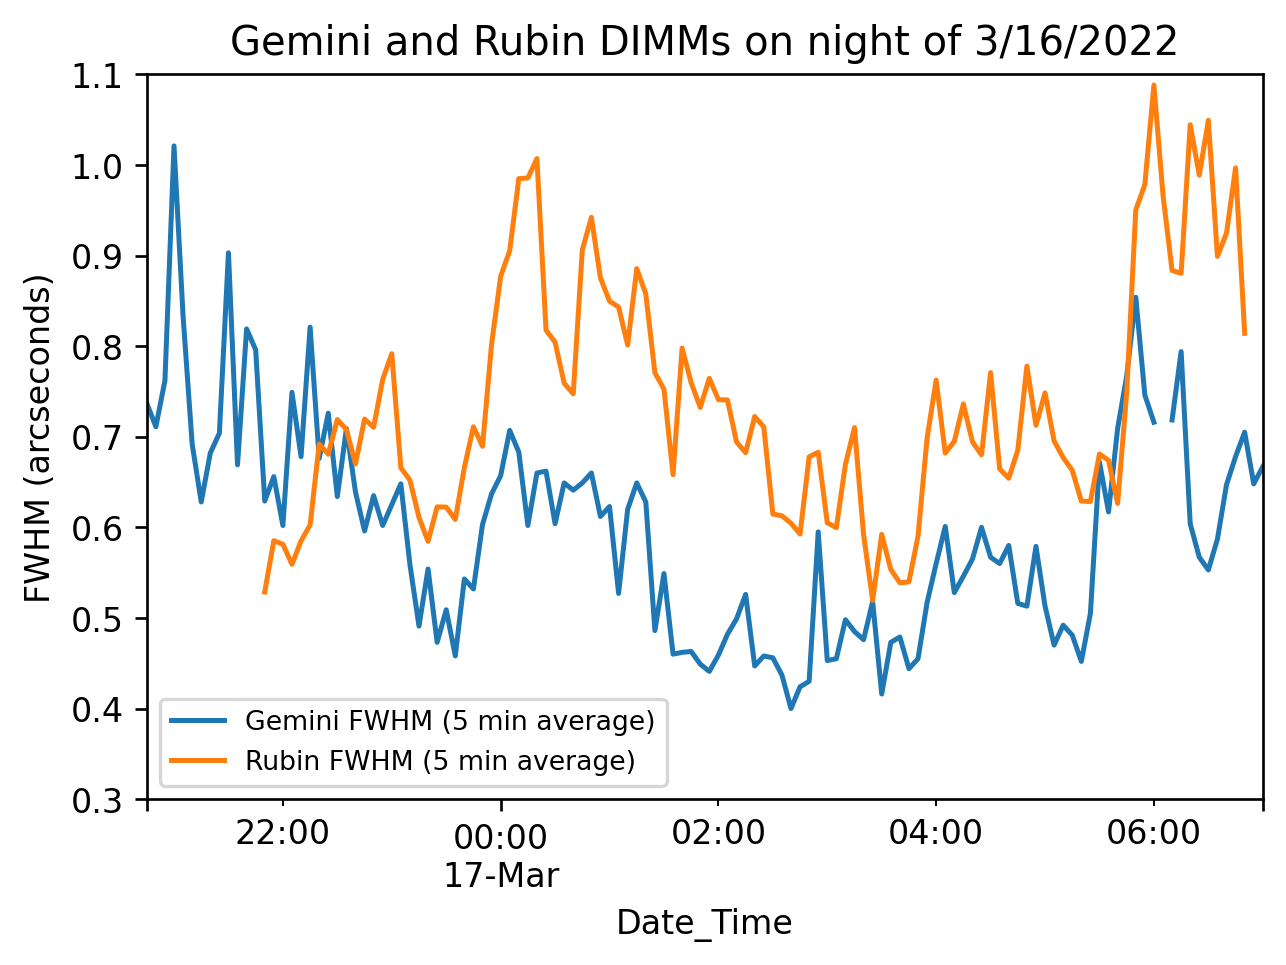

In [6]:
gemini_5.dimmFwhm.plot(label = 'Gemini FWHM (5 min average)')
dimm_5.fwhm.plot(label = 'Rubin FWHM (5 min average)')

plt.title(r'Gemini and Rubin DIMMs on night of 3/16/2022')
plt.ylabel(r'FWHM (arcseconds)');
plt.legend(fontsize=8)

plt.ylim(0.3, 1.1)